In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('../ML/Movie review/IMDB dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [17]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [20]:
blanks = []
for i,rv,lbl in df.itertuples():
    if type(rv) == str:
        if rv.isspace():
            blanks.append(i)

In [21]:
blanks

[]

In [22]:
df['len'] = df['review'].apply(len)

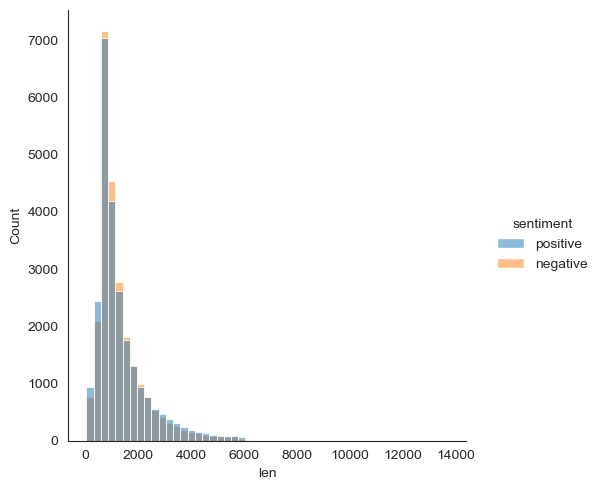

In [23]:
sns.displot(x='len',data = df,bins=50,hue='sentiment')

<Axes: xlabel='sentiment', ylabel='count'>

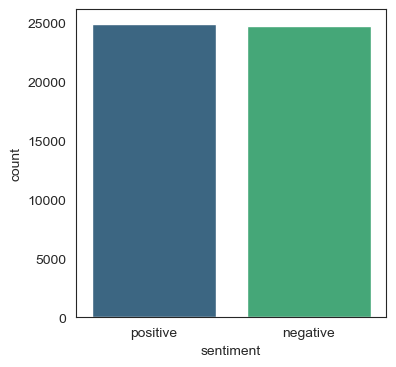

In [24]:
plt.figure(figsize=(4,4))
sns.set_style('white')
sns.countplot(x='sentiment',data=df,palette='viridis')

In [25]:
#removing stopwords and punct
import spacy
nlp = spacy.load('en_core_web_lg')

In [26]:
def clean_text(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if not token.is_punct and not token.is_stop])

In [27]:
df['clean_text'] = df['review'].apply(clean_text)

In [28]:
import nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['stem_text'] = df['review'].apply(lambda rev : stemmer.stem(rev))

In [29]:
def lemmatize_text(text):
    #pass text as a doc object
    doc = nlp(text.lower())
    #lemmatize it 
    lemma = ' '.join([token.lemma_ for token in doc])
    return lemma

In [30]:
df['lemma_text'] = df['review'].apply(lemmatize_text)

KeyboardInterrupt: 

In [ ]:
#encoding label
sent_map = {'positive':1,'negative':0}
df['sentiment'] = df['sentiment'].replace(sent_map)

In [ ]:
#using spacy built in vectorizer (word2vec) to convert text into vector
#doc2vec
def vectorize(text):
    doc = nlp(text)
    return doc.vector

In [ ]:
df.head()

In [ ]:
text_raw_vect = df['clean_text'].apply(vectorize)
text_stem_vect = df['stem_text'].apply(vectorize)
text_lemm_vect = df['lemma_text'].apply(vectorize)
label = df['is_depression']
from tensorflow.keras.utils import to_categorical
label_en = to_categorical(label,num_classes=2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
text_raw_train_vect,text_raw_test_vect,label_train_en,label_test_en = train_test_split(text_raw_vect,label_en,test_size=0.25,random_state=42)

In [ ]:
text_stem_train_vect,text_stem_test_vect,_,_ = train_test_split(text_stem_vect,label_en,test_size=0.25,random_state=42)

In [ ]:
text_lemm_train_vect,text_lemm_test_vect,_,_ = train_test_split(text_lemm_vect,label_en,test_size=0.25,random_state=42)

In [ ]:
text_raw_train_vect = np.array(text_raw_train_vect.tolist())
text_raw_test_vect = np.array(text_raw_test_vect.tolist())
text_stem_train_vect = np.array(text_stem_train_vect.tolist())
text_stem_test_vect = np.array(text_stem_test_vect.tolist())
text_lemm_train_vect = np.array(text_lemm_train_vect.tolist())
text_lemm_test_vect = np.array(text_lemm_test_vect.tolist())

In [ ]:
text_raw_train_vect